In [ ]:
import pandas as pd

# Replace with your actual file name if different
df = pd.read_csv('/content/stock_details_5_years.csv')

# Show first few rows
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Company
0,2018-11-29 00:00:00-05:00,43.829761,43.863354,42.639594,43.083508,167080000,0.00,0.0,AAPL
1,2018-11-29 00:00:00-05:00,104.769074,105.519257,103.534595,104.636131,28123200,0.00,0.0,MSFT
2,2018-11-29 00:00:00-05:00,54.176498,55.007500,54.099998,54.729000,31004000,0.00,0.0,GOOGL
3,2018-11-29 00:00:00-05:00,83.749496,84.499496,82.616501,83.678497,132264000,0.00,0.0,AMZN
4,2018-11-29 00:00:00-05:00,39.692784,40.064904,38.735195,39.037853,54917200,0.04,0.0,NVDA


In [ ]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Filter only Apple (AAPL) data
aapl_df = df[df['Company'] == 'AAPL'].copy()

# Sort by date
aapl_df.sort_values('Date', inplace=True)

# Reset index
aapl_df.reset_index(drop=True, inplace=True)

# Display the result
aapl_df.head()


<ipython-input-18-28e9b3c59cb9>:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Date'] = pd.to_datetime(df['Date'])


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Company
0,2018-11-29 00:00:00-05:00,43.829761,43.863354,42.639594,43.083508,167080000,0.0,0.0,AAPL
1,2018-11-30 00:00:00-05:00,43.261071,43.270671,42.478826,42.850754,158126000,0.0,0.0,AAPL
2,2018-12-03 00:00:00-05:00,44.261681,44.376858,43.481835,44.348064,163210000,0.0,0.0,AAPL
3,2018-12-04 00:00:00-05:00,43.419445,43.764977,42.296468,42.397247,165377200,0.0,0.0,AAPL
4,2018-12-06 00:00:00-05:00,41.214280,41.938938,40.892744,41.924541,172393600,0.0,0.0,AAPL


In [ ]:
!pip install --upgrade numpy
!pip install --upgrade pandas_ta


In [ ]:
!pip install numpy==1.23.5
!pip install --upgrade pandas_ta


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 74.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.5
    Uninstalling numpy-2.2.5:
      Successfully uninstalled numpy-2.2.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.23.5 which is incompatible.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.23.5 which is incompatible.
scikit-image 0.25.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
blosc2 3.3.1 requires numpy>=1.26, but you have numpy 1.23.5 which is incompatible.
albucore 0.0.23 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
xarray 2025.3.1 requires numpy>=1.24, but you have numpy 1.2

In [ ]:
import pandas_ta as ta
import pandas as pd

# Assuming aapl_df is your dataset
# Calculate 30-day Simple Moving Average (SMA)
aapl_df['SMA_30'] = ta.sma(aapl_df['Close'], length=30)

# Calculate 14-day Relative Strength Index (RSI)
aapl_df['RSI'] = ta.rsi(aapl_df['Close'], length=14)

# Calculate Bollinger Bands (20-day)
bb = ta.bbands(aapl_df['Close'], length=20)
aapl_df = pd.concat([aapl_df, bb], axis=1)

# Drop rows with missing values from indicators
aapl_df.dropna(inplace=True)

# Show the result
aapl_df[['Date', 'Close', 'SMA_30', 'RSI', 'BBL_20_2.0', 'BBU_20_2.0']].head()


,Date,Close,SMA_30,RSI,BBL_20_2.0,BBU_20_2.0
29,2019-01-14 00:00:00-05:00,35.992908,38.677499,38.803891,34.145971,40.107638
30,2019-01-15 00:00:00-05:00,36.729561,38.465700,43.402108,34.239960,39.715868
31,2019-01-16 00:00:00-05:00,37.178276,38.276618,46.060771,34.351221,39.388649
32,2019-01-17 00:00:00-05:00,37.399021,38.044983,47.370547,34.610856,38.884022
33,2019-01-18 00:00:00-05:00,37.629387,37.886054,48.768651,34.693571,38.703647


In [ ]:
# Check for missing values in the dataset
aapl_df.isnull().sum()


,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0
Dividends,0
Stock Splits,0
Company,0
SMA_30,0


In [ ]:
df.shape

(602962, 9)

In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = aapl_df['Close'].quantile(0.25)
Q3 = aapl_df['Close'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
aapl_df_filtered = aapl_df[(aapl_df['Close'] >= lower_bound) & (aapl_df['Close'] <= upper_bound)]

# Show the shape of the filtered dataframe
print(f"Original data shape: {aapl_df.shape}")
print(f"Filtered data shape: {aapl_df_filtered.shape}")


Original data shape: (1229, 16)
Filtered data shape: (1229, 16)


In [ ]:
# Count the number of rows where the 'Company' column is 'AAPL'
apple_rows_count = aapl_df[aapl_df['Company'] == 'AAPL'].shape[0]

print(f"Number of rows containing Apple (AAPL) data: {apple_rows_count}")


Number of rows containing Apple (AAPL) data: 1229


In [ ]:
# Check the number of columns in the dataset
print(f"Number of columns in the dataset: {aapl_df.shape[1]}")

# List the column names to ensure there are 16 columns
print("Columns in the dataset:", aapl_df.columns)


Number of columns in the dataset: 16
Columns in the dataset: Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits', 'Company', 'SMA_30', 'RSI', 'BBL_20_2.0', 'BBM_20_2.0',
       'BBU_20_2.0', 'BBB_20_2.0', 'BBP_20_2.0'],
      dtype='object')


In [ ]:
from sklearn.ensemble import IsolationForest


In [ ]:
# Select relevant columns for anomaly detection
features = aapl_df[['Close', 'SMA_30', 'RSI', 'BBL_20_2.0', 'BBU_20_2.0']]

# Initialize the Isolation Forest model
iso_forest = IsolationForest(contamination=0.05, random_state=42)  # contamination is the fraction of anomalies

# Fit the model
iso_forest.fit(features)

# Predict anomalies (1 = normal, -1 = anomaly)
aapl_df['anomaly'] = iso_forest.predict(features)

# Mark the anomalies in the dataset
anomalies = aapl_df[aapl_df['anomaly'] == -1]

print(f"Number of anomalies detected: {len(anomalies)}")


Number of anomalies detected: 62


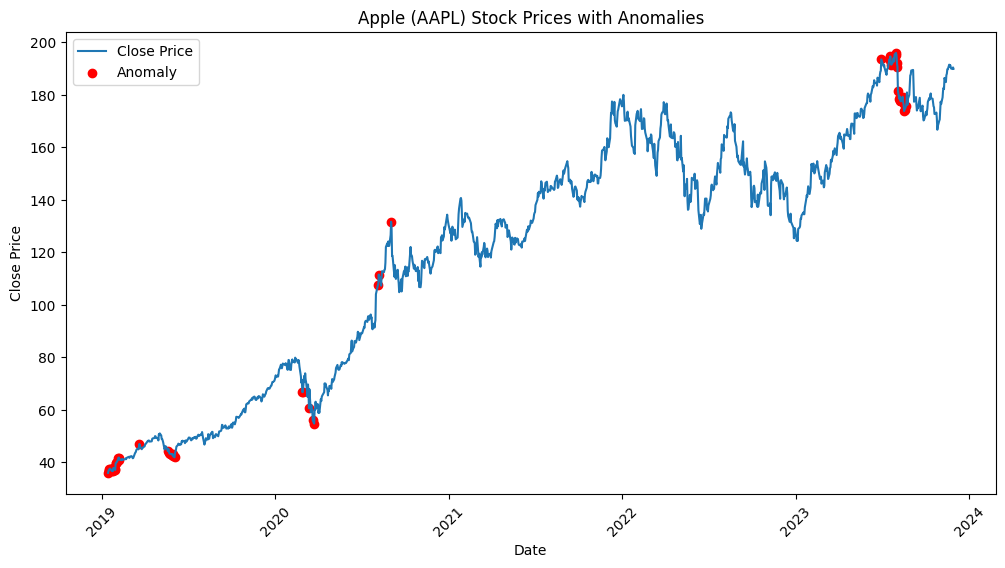

In [ ]:
import matplotlib.pyplot as plt

# Plot the closing prices and highlight the anomalies
plt.figure(figsize=(12, 6))
plt.plot(aapl_df['Date'], aapl_df['Close'], label='Close Price')
plt.scatter(anomalies['Date'], anomalies['Close'], color='red', label='Anomaly', marker='o')
plt.title('Apple (AAPL) Stock Prices with Anomalies')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [ ]:
!pip install prophet


In [ ]:
# First, convert 'Date' to datetime (without assuming it’s naive)
aapl_df_cleaned['ds'] = pd.to_datetime(aapl_df_cleaned['ds'], errors='coerce')

# If the 'ds' column is timezone-aware, convert it to UTC
if aapl_df_cleaned['ds'].dt.tz is not None:
    aapl_df_cleaned['ds'] = aapl_df_cleaned['ds'].dt.tz_convert('UTC')

# Convert to naive datetime (remove timezone)
aapl_df_cleaned['ds'] = aapl_df_cleaned['ds'].dt.tz_localize(None)

# Display the cleaned dataframe
aapl_df_cleaned.head()


,ds,y
29,2019-01-14 05:00:00,35.992908
30,2019-01-15 05:00:00,36.729561
31,2019-01-16 05:00:00,37.178276
32,2019-01-17 05:00:00,37.399021
33,2019-01-18 05:00:00,37.629387


In [ ]:
# Drop rows with missing values in 'ds' or 'y'
aapl_df_cleaned = aapl_df_cleaned.dropna(subset=['ds', 'y'])

# Double-check for NaNs (should be 0)
print(aapl_df_cleaned.isna().sum())


ds    0
y     0
dtype: int64


In [ ]:
from prophet import Prophet

# Initialize the Prophet model
model = Prophet()

# Fit the model to your cleaned data
model.fit(aapl_df_cleaned)

# Create a future dataframe for the next 60 days
future = model.make_future_dataframe(periods=60)

# Predict future values
forecast = model.predict(future)

# Show the forecast
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjo74lxrg/0j44qfs2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjo74lxrg/8vu12m5v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95009', 'data', 'file=/tmp/tmpjo74lxrg/0j44qfs2.json', 'init=/tmp/tmpjo74lxrg/8vu12m5v.json', 'output', 'file=/tmp/tmpjo74lxrg/prophet_modelc4rnsyc7/prophet_model-20250429051724.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:17:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:17:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
456,2024-01-24 05:00:00,196.805678,189.757409,203.279919
457,2024-01-25 05:00:00,196.970849,190.111712,203.446902
458,2024-01-26 05:00:00,197.275055,190.321980,204.305376
459,2024-01-27 05:00:00,205.208163,197.946873,212.031179
460,2024-01-28 05:00:00,205.721030,199.220449,212.742666


In [ ]:
# Step 1: Merge actual data with forecast
# Keep only the forecast period dates that match actuals (if available)
merged_df = pd.merge(aapl_df_cleaned, forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], on='ds', how='inner')

# Step 2: Flag anomalies
# An anomaly is when the actual 'y' value is outside the forecast interval
merged_df['anomaly'] = (merged_df['y'] < merged_df['yhat_lower']) | (merged_df['y'] > merged_df['yhat_upper'])

# Step 3: View the anomalies
anomalies = merged_df[merged_df['anomaly']]
print(f"Number of anomalies detected: {anomalies.shape[0]}")
anomalies[['ds', 'y', 'yhat', 'yhat_lower', 'yhat_upper']]


Number of anomalies detected: 75


,ds,y,yhat,yhat_lower,yhat_upper
116,2020-02-27 05:00:00,66.776100,74.718391,68.027865,81.374650
117,2020-02-28 05:00:00,66.737022,74.664449,67.770170,81.378896
138,2020-11-23 05:00:00,111.874184,118.721765,111.975404,125.354255
161,2020-12-28 05:00:00,134.317825,124.106315,117.359953,130.943006
162,2020-12-29 05:00:00,132.529404,124.178796,117.107761,130.965378
...,...,...,...,...,...
345,2023-01-13 05:00:00,134.010941,142.341847,135.159972,149.309517
346,2023-01-17 05:00:00,135.184372,142.639072,136.277362,149.382548
347,2023-01-18 05:00:00,134.458450,142.953551,135.837027,149.624021
348,2023-01-19 05:00:00,134.518112,142.860278,136.664082,149.930038


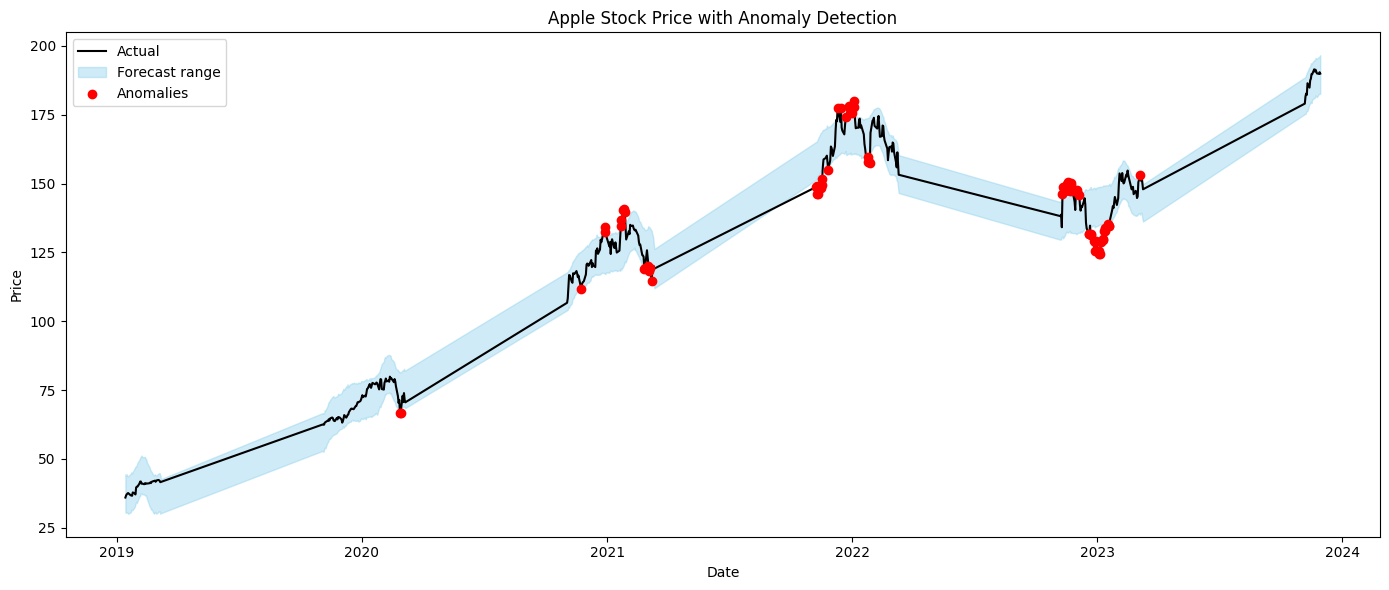

In [ ]:
import matplotlib.pyplot as plt

# Plot actual vs forecast with anomalies
plt.figure(figsize=(14, 6))

# Plot actual closing prices
plt.plot(merged_df['ds'], merged_df['y'], label='Actual', color='black')

# Plot forecast range
plt.fill_between(merged_df['ds'], merged_df['yhat_lower'], merged_df['yhat_upper'],
                 color='skyblue', alpha=0.4, label='Forecast range')

# Highlight anomalies
anomaly_points = merged_df[merged_df['anomaly']]
plt.scatter(anomaly_points['ds'], anomaly_points['y'], color='red', label='Anomalies', zorder=5)

# Add labels and legend
plt.title('Apple Stock Price with Anomaly Detection')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()


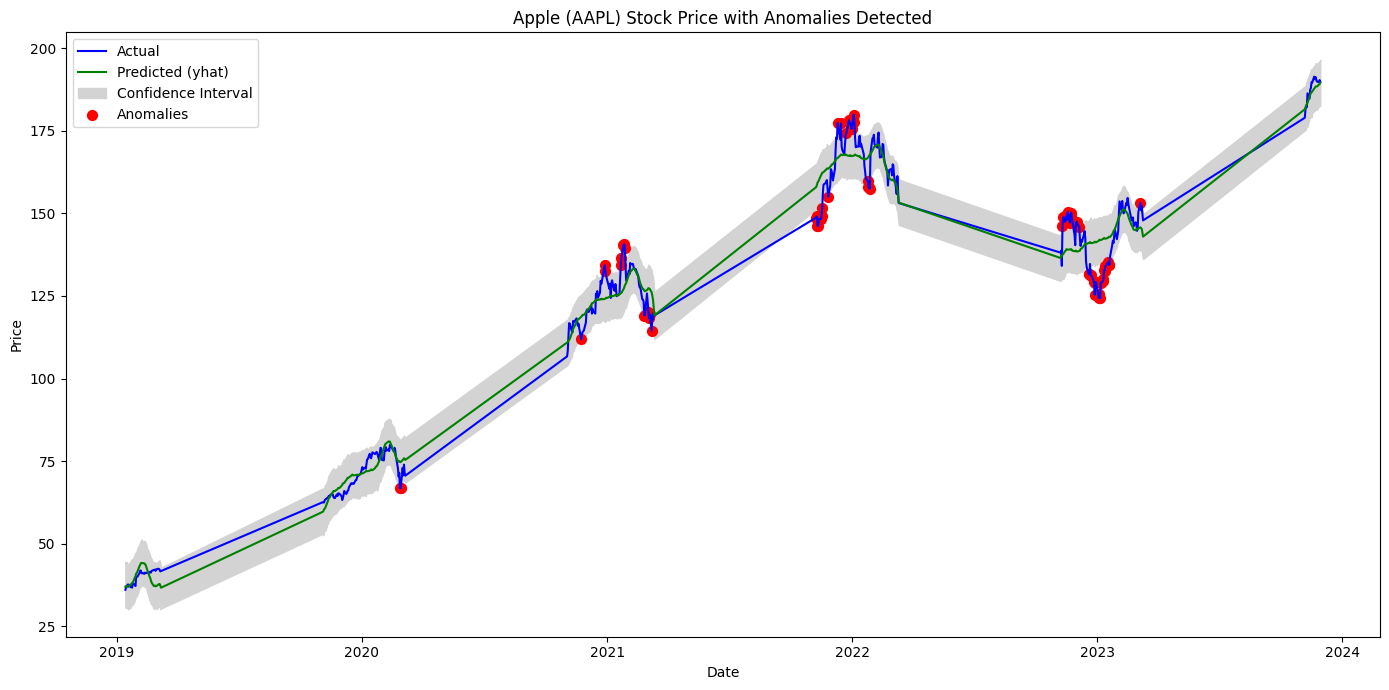

In [ ]:
import matplotlib.pyplot as plt

# Merge actual data with predictions
df_merged = pd.merge(aapl_df_cleaned, forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], on='ds')

# Identify anomalies again for plotting
df_merged['anomaly'] = ((df_merged['y'] < df_merged['yhat_lower']) | (df_merged['y'] > df_merged['yhat_upper']))

# Plot
plt.figure(figsize=(14, 7))
plt.plot(df_merged['ds'], df_merged['y'], label='Actual', color='blue')
plt.plot(df_merged['ds'], df_merged['yhat'], label='Predicted (yhat)', color='green')
plt.fill_between(df_merged['ds'], df_merged['yhat_lower'], df_merged['yhat_upper'], color='lightgrey', label='Confidence Interval')
plt.scatter(df_merged[df_merged['anomaly']]['ds'], df_merged[df_merged['anomaly']]['y'], color='red', label='Anomalies', s=50)

plt.title('Apple (AAPL) Stock Price with Anomalies Detected')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Display top anomalies sorted by deviation from prediction
df_merged['deviation'] = abs(df_merged['y'] - df_merged['yhat'])
top_anomalies = df_merged[df_merged['anomaly']].sort_values(by='deviation', ascending=False)

# Show top 10 significant anomalies
top_anomalies[['ds', 'y', 'yhat', 'yhat_lower', 'yhat_upper', 'deviation']].head(10)


,ds,y,yhat,yhat_lower,yhat_upper,deviation
339,2023-01-05 05:00:00,124.325081,141.946749,135.134299,148.881932,17.621668
337,2023-01-03 05:00:00,124.374802,141.728983,134.810172,148.751153,17.354181
338,2023-01-04 05:00:00,125.657639,142.057180,135.097932,148.639829,16.399542
334,2022-12-28 05:00:00,125.339417,141.460962,134.024556,148.420001,16.121545
216,2021-11-11 05:00:00,146.199570,159.626393,152.738129,166.365238,13.426823
179,2021-01-25 05:00:00,140.439728,127.072637,120.076506,133.973210,13.367091
180,2021-01-26 05:00:00,140.675522,127.517347,120.703515,134.594018,13.158175
218,2021-11-15 05:00:00,148.305496,161.459927,154.812916,168.399195,13.154431
215,2021-11-10 05:00:00,146.248993,159.298109,152.852985,165.753173,13.049116
340,2023-01-06 05:00:00,128.899521,141.920954,134.988154,148.744739,13.021433
